# Artificial Intelligence– A1(IITJ)
**Prepared by :**
**Mahantesh Hiremath- G24AIT2178**

A.) Dynamic Goal-Based Agent for Warehouse Logistics Optimization.
A robotic agent operates in a warehouse modeled as an N×M grid environment. The agent starts at a predefined loading dock and must deliver packages to multiple destinations marked on the grid while avoiding dynamically placed obstacles.
Take suitable values of the following parameters.
- Warehouse dimensions: N×M grid size (M,N between 5 and 10, inclusive)
- Number of packages: P (between 2 and 6, inclusive)
- Number of obstacles: O (between 1 and 10, inclusive)
- Package locations: (X1, Y1), (X2, Y2), ... (XP, YP)
- Drop-off locations: (D1X, D1Y), (D2X, D2Y), ... (DPX, DPY)
- Robot starting position: S=(Sx,Sy), starts at a fixed cell but moves dynamically
- Movement cost: Each movement incurs a cost of 1 unit
- Delivery reward: Successfully delivering a package adds 10 units to the total reward
- Obstacle penalty: Hitting an obstacle results in a (-5) penalty
Note : Packages locations and drop-off locations should not overlap.




# Q1. Represent the warehouse as an N×M matrix. Place the packages, drop-off points, and obstacles randomly. Display the initial warehouse configuration.


In [ ]:
pip install numpy

In [4]:
import numpy as np

# Parameters
N, M = 8, 8  # Warehouse dimensions
P = 4  # Number of packages
O = 5  # Number of obstacles

# Initialize the warehouse grid
warehouse = np.full((N, M), '.')

# Randomly place packages and drop-off points
package_locations = []
dropoff_locations = []

for i in range(P):
    while True:
        # Randomly select package location
        package = (np.random.randint(0, N), np.random.randint(0, M))
        # Randomly select drop-off location
        dropoff = (np.random.randint(0, N), np.random.randint(0, M))
        
        # Ensure package and drop-off locations do not overlap
        if package != dropoff and package not in package_locations and dropoff not in dropoff_locations:
            package_locations.append(package)
            dropoff_locations.append(dropoff)
            break

# Place packages and drop-off points on the grid
for idx, (x, y) in enumerate(package_locations):
    warehouse[x][y] = f'P{idx+1}'  # Mark packages as P1, P2, etc.

for idx, (x, y) in enumerate(dropoff_locations):
    warehouse[x][y] = f'D{idx+1}'  # Mark drop-off points as D1, D2, etc.

# Randomly place obstacles
obstacle_locations = []
for _ in range(O):
    while True:
        obstacle = (np.random.randint(0, N), np.random.randint(0, M))
        # Ensure obstacles do not overlap with packages, drop-off points, or other obstacles
        if warehouse[obstacle[0]][obstacle[1]] == '.':
            warehouse[obstacle[0]][obstacle[1]] = 'O'  # Mark obstacles as 'O'
            obstacle_locations.append(obstacle)
            break

# Display the initial warehouse configuration
print("Initial Warehouse Configuration:")
print(warehouse)

# Print locations for reference
print("\nPackage Locations:", package_locations)
print("Drop-off Locations:", dropoff_locations)
print("Obstacle Locations:", obstacle_locations)

Initial Warehouse Configuration:
[['.' '.' '.' '.' '.' '.' 'O' '.']
 ['.' '.' '.' '.' '.' '.' 'D' 'O']
 ['.' '.' 'P' '.' 'P' 'D' '.' '.']
 ['.' '.' '.' '.' '.' 'O' '.' 'D']
 ['.' 'D' '.' '.' '.' '.' '.' '.']
 ['O' '.' '.' '.' '.' '.' 'O' 'P']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']]

Package Locations: [(3, 7), (5, 7), (2, 4), (2, 2)]
Drop-off Locations: [(4, 1), (2, 5), (1, 6), (3, 7)]
Obstacle Locations: [(0, 6), (1, 7), (5, 6), (3, 5), (5, 0)]


# Q2. Implement a goal-based agent that can identify all goals, plan a sequence of actions to reach the goal, use a search algorithm (BFS, DFS, or UCS) to find optimal paths, deliver all packages, and calculate the total cost.

In [5]:
import numpy as np
from queue import PriorityQueue

# Warehouse parameters
N, M = 8, 8  # Warehouse dimensions
P = 4  # Number of packages
O = 5  # Number of obstacles

# Initialize the warehouse grid
warehouse = np.full((N, M), '.')

# Randomly place packages and drop-off points
package_locations = []
dropoff_locations = []

for i in range(P):
    while True:
        # Randomly select package location
        package = (np.random.randint(0, N), np.random.randint(0, M))
        # Randomly select drop-off location
        dropoff = (np.random.randint(0, N), np.random.randint(0, M))
        
        # Ensure package and drop-off locations do not overlap
        if package != dropoff and package not in package_locations and dropoff not in dropoff_locations:
            package_locations.append(package)
            dropoff_locations.append(dropoff)
            break

# Place packages and drop-off points on the grid
for idx, (x, y) in enumerate(package_locations):
    warehouse[x][y] = f'P{idx+1}'  # Mark packages as P1, P2, etc.

for idx, (x, y) in enumerate(dropoff_locations):
    warehouse[x][y] = f'D{idx+1}'  # Mark drop-off points as D1, D2, etc.

# Randomly place obstacles
obstacle_locations = []
for _ in range(O):
    while True:
        obstacle = (np.random.randint(0, N), np.random.randint(0, M))
        # Ensure obstacles do not overlap with packages, drop-off points, or other obstacles
        if warehouse[obstacle[0]][obstacle[1]] == '.':
            warehouse[obstacle[0]][obstacle[1]] = 'O'  # Mark obstacles as 'O'
            obstacle_locations.append(obstacle)
            break

# Display the initial warehouse configuration
print("Initial Warehouse Configuration:")
print(warehouse)

# Print locations for reference
print("\nPackage Locations:", package_locations)
print("Drop-off Locations:", dropoff_locations)
print("Obstacle Locations:", obstacle_locations)

# Define the agent's starting position
start_position = (0, 0)  # Loading dock

# Movement directions (up, down, left, right)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Uniform Cost Search (UCS) algorithm
def ucs(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put((0, start))  # (cost, position)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current_cost, current_pos = frontier.get()

        if current_pos == goal:
            break

        for direction in directions:
            next_pos = (current_pos[0] + direction[0], current_pos[1] + direction[1])
            if 0 <= next_pos[0] < N and 0 <= next_pos[1] < M:  # Check boundaries
                if grid[next_pos[0]][next_pos[1]] == 'O':  # Obstacle
                    continue
                new_cost = current_cost + 1  # Movement cost is 1
                if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                    cost_so_far[next_pos] = new_cost
                    priority = new_cost
                    frontier.put((priority, next_pos))
                    came_from[next_pos] = current_pos

    # Reconstruct path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path, cost_so_far[goal]

# Agent logic
total_cost = 0
total_reward = 0
current_position = start_position

for i in range(P):
    package = package_locations[i]
    dropoff = dropoff_locations[i]

    # Plan path from current position to package
    path_to_package, cost_to_package = ucs(current_position, package, warehouse)
    print(f"\nPath to Package {i+1}: {path_to_package}")
    print(f"Cost to Package {i+1}: {cost_to_package}")
    total_cost += cost_to_package

    # Plan path from package to drop-off
    path_to_dropoff, cost_to_dropoff = ucs(package, dropoff, warehouse)
    print(f"Path to Drop-off {i+1}: {path_to_dropoff}")
    print(f"Cost to Drop-off {i+1}: {cost_to_dropoff}")
    total_cost += cost_to_dropoff

    # Update current position
    current_position = dropoff

    # Add delivery reward
    total_reward += 10

# Calculate total reward after penalties
total_penalty = 0  # Assuming no obstacles are hit in the path
final_reward = total_reward - total_cost - total_penalty

print("\nTotal Cost:", total_cost)
print("Total Reward:", total_reward)
print("Final Reward (Reward - Cost - Penalty):", final_reward)

Initial Warehouse Configuration:
[['.' '.' 'D' '.' '.' '.' '.' '.']
 ['.' '.' '.' 'P' '.' '.' '.' '.']
 ['.' '.' 'O' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'O' '.' '.' '.']
 ['.' 'P' '.' '.' '.' '.' 'P' 'D']
 ['O' 'O' '.' '.' '.' '.' '.' 'D']
 ['.' '.' '.' '.' '.' 'D' '.' '.']
 ['.' '.' 'O' '.' '.' '.' '.' 'P']]

Package Locations: [(1, 3), (4, 1), (7, 7), (4, 6)]
Drop-off Locations: [(6, 5), (5, 7), (4, 7), (0, 2)]
Obstacle Locations: [(3, 4), (5, 1), (7, 2), (2, 2), (5, 0)]

Path to Package 1: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3)]
Cost to Package 1: 4
Path to Drop-off 1: [(1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5)]
Cost to Drop-off 1: 7

Path to Package 2: [(6, 5), (5, 5), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1)]
Cost to Package 2: 6
Path to Drop-off 2: [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 7)]
Cost to Drop-off 2: 7

Path to Package 3: [(5, 7), (6, 7), (7, 7)]
Cost to Package 3: 2
Path to Drop-off 3: [(7, 7), (6, 7), (5, 7), (4, 7)]
Cost t

# Q3. Choose a random seed value for the ease of reproducing the results. Your program should give outputs: the chosen path taken by the agent, total cost and rewards, final score based on penalties, movement costs, and successful deliveries.

In [7]:
import numpy as np
from queue import PriorityQueue

# Set a random seed for reproducibility
np.random.seed(42)

# Warehouse parameters
N, M = 8, 8  # Warehouse dimensions
P = 4  # Number of packages
O = 5  # Number of obstacles

# Initialize the warehouse grid
warehouse = np.full((N, M), '.')

# Randomly place packages and drop-off points
package_locations = []
dropoff_locations = []

for i in range(P):
    while True:
        # Randomly select package location
        package = (np.random.randint(0, N), np.random.randint(0, M))
        # Randomly select drop-off location
        dropoff = (np.random.randint(0, N), np.random.randint(0, M))
        
        # Ensure package and drop-off locations do not overlap
        if package != dropoff and package not in package_locations and dropoff not in dropoff_locations:
            package_locations.append(package)
            dropoff_locations.append(dropoff)
            break

# Place packages and drop-off points on the grid
for idx, (x, y) in enumerate(package_locations):
    warehouse[x][y] = f'P{idx+1}'  # Mark packages as P1, P2, etc.

for idx, (x, y) in enumerate(dropoff_locations):
    warehouse[x][y] = f'D{idx+1}'  # Mark drop-off points as D1, D2, etc.

# Randomly place obstacles
obstacle_locations = []
for _ in range(O):
    while True:
        obstacle = (np.random.randint(0, N), np.random.randint(0, M))
        # Ensure obstacles do not overlap with packages, drop-off points, or other obstacles
        if warehouse[obstacle[0]][obstacle[1]] == '.':
            warehouse[obstacle[0]][obstacle[1]] = 'O'  # Mark obstacles as 'O'
            obstacle_locations.append(obstacle)
            break

# Display the initial warehouse configuration
print("Initial Warehouse Configuration:")
print(warehouse)

# Print locations for reference
print("\nPackage Locations:", package_locations)
print("Drop-off Locations:", dropoff_locations)
print("Obstacle Locations:", obstacle_locations)

# Define the agent's starting position
start_position = (0, 0)  # Loading dock

# Movement directions (up, down, left, right)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Uniform Cost Search (UCS) algorithm
def ucs(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put((0, start))  # (cost, position)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current_cost, current_pos = frontier.get()

        if current_pos == goal:
            break

        for direction in directions:
            next_pos = (current_pos[0] + direction[0], current_pos[1] + direction[1])
            if 0 <= next_pos[0] < N and 0 <= next_pos[1] < M:  # Check boundaries
                if grid[next_pos[0]][next_pos[1]] == 'O':  # Obstacle
                    continue
                new_cost = current_cost + 1  # Movement cost is 1
                if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                    cost_so_far[next_pos] = new_cost
                    priority = new_cost
                    frontier.put((priority, next_pos))
                    came_from[next_pos] = current_pos

    # Reconstruct path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path, cost_so_far[goal]

# Agent logic
total_cost = 0
total_reward = 0
total_penalty = 0
current_position = start_position

for i in range(P):
    package = package_locations[i]
    dropoff = dropoff_locations[i]

    # Plan path from current position to package
    path_to_package, cost_to_package = ucs(current_position, package, warehouse)
    print(f"\nPath to Package {i+1}: {path_to_package}")
    print(f"Cost to Package {i+1}: {cost_to_package}")
    total_cost += cost_to_package

    # Plan path from package to drop-off
    path_to_dropoff, cost_to_dropoff = ucs(package, dropoff, warehouse)
    print(f"Path to Drop-off {i+1}: {path_to_dropoff}")
    print(f"Cost to Drop-off {i+1}: {cost_to_dropoff}")
    total_cost += cost_to_dropoff

    # Update current position
    current_position = dropoff

    # Add delivery reward
    total_reward += 10

# Calculate final score
final_score = total_reward - total_cost - total_penalty

# Output results
print("\n--- Final Results ---")
print(f"Total Cost: {total_cost}")
print(f"Total Reward: {total_reward}")
print(f"Total Penalty: {total_penalty}")
print(f"Final Score (Reward - Cost - Penalty): {final_score}")

Initial Warehouse Configuration:
[['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' 'O']
 ['.' '.' 'P' '.' '.' '.' 'D' 'P']
 ['.' '.' '.' '.' '.' 'O' '.' 'O']
 ['.' '.' '.' '.' 'D' '.' 'D' '.']
 ['.' '.' '.' '.' 'O' '.' '.' '.']
 ['.' 'P' '.' 'P' '.' '.' '.' '.']
 ['.' '.' 'O' '.' 'D' '.' '.' '.']]

Package Locations: [(6, 3), (2, 7), (6, 1), (2, 2)]
Drop-off Locations: [(4, 6), (4, 4), (2, 6), (7, 4)]
Obstacle Locations: [(3, 7), (7, 2), (5, 4), (1, 7), (3, 5)]

Path to Package 1: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3)]
Cost to Package 1: 9
Path to Drop-off 1: [(6, 3), (5, 3), (4, 3), (4, 4), (4, 5), (4, 6)]
Cost to Drop-off 1: 5

Path to Package 2: [(4, 6), (3, 6), (2, 6), (2, 7)]
Cost to Package 2: 3
Path to Drop-off 2: [(2, 7), (2, 6), (2, 5), (2, 4), (3, 4), (4, 4)]
Cost to Drop-off 2: 5

Path to Package 3: [(4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1)]
Cost to Package 3: 5
Path to Drop-off 3: [(6, 1), (5, 1), (4, 1), (3, 1)

B.) Suppose you and your friend live in different cities on a map and you both are planning for a common meetup place which is optimal for you both. Let’s find the common meetup with a little twist.
On every turn, you and your friend can simultaneously move to a neighboring city on the map. The amount of time needed to move from city i to neighbor j is equal to the straight line distance d(i, j)x2 between the cities, but on each turn the friend that arrives first must wait until the other one arrives (and calls the first on his/her cell phone) before the next turn can begin. The heuristic you are assuming is the straight line distance d(i,j). You both friends want to meet as quickly as possible.
1. Formulate this search problem and display the map of the city with heuristic (h) and transition cost (g).
2. Implement search strategies: a. Greedy Best First Search b. A* and provide the Search Cost (nodes generated, space and time taken for execution ) for both of them.
3. Change the heuristic function d(i, j) from the straight-line distance between cities i and j to more realistic functions such as road or train route distance. And provide the analysis of the solution for different heuristic functions in terms of Search Cost (nodes generated, space and time taken for execution ).
Note:
1. Use maps of India for the cities [Taluka level granularity is expected]. One city will be your current city and Your friend City should be at least in a different state. You can take lat, long of the Taluka center for calculating the distance.
2. Take necessary Assumptions.
Material:
Can use the following links for maps.
https://surveyofindia.gov.in/pages/political-map-of-india
Can use QGIS for initial preprocessing of the maps or Geopandas

In [9]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 1.0 MB/s eta 0:00:15
   -- ------------------------------------- 1.0/16.2 MB 1.8 MB/s eta 0:00:09
   ---- ----------------------------------- 1.8/16.2 MB 2.1 MB/s eta 0:00:07
   ----- ---------------------------------- 2.4/16.2 MB 2.3 MB/s eta 0:00:06
   -------- ------------------------------- 3.4/16.2 MB 2.7 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/16.2 MB 2.9 MB/s eta 0:00:05
   ------------ --------------------------- 5.2/16.2 MB 3.1 MB/s eta 0:00:04
   --------------- ------------------------ 6.3/16.2 MB 3.3 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/16.2 MB 3.5 MB/s eta 0:00:03
   ------------------- -------------------- 7.9/16.2 MB 3.6 MB/s eta 0:00:03
   ---------------------- ----------------- 8.9/16.2 MB 3.5 MB/s eta 0:00:03
   ----------

In [3]:
import geopandas as gpd

shapefile = gpd.read_file("../archive/DISTRICT_BOUNDARY.shp")
shapefile

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJAR>T,None,24,673,539476.764723,4.791280e+09,"POLYGON ((3108952.09 3942577.01, 3109009.987 3..."
1,AHMAD>B>D,GUJAR>T,None,24,438,857254.094647,6.966374e+09,"POLYGON ((3193648.356 3920619.089, 3193646.392..."
2,>NAND,GUJAR>T,None,24,440,393046.690523,3.054307e+09,"POLYGON ((3297696.184 3879979.348, 3297775.311..."
3,DEVBHUMI DW>RKA,GUJAR>T,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((2924145.687 3865429.524, 29241..."
4,J>MNAGAR,GUJAR>T,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((3044918.968 3859136.847, 30448..."
...,...,...,...,...,...,...,...,...
737,SONITPUR,ASSAM,NOT VERIFIED,18,301,302021.098402,3.318736e+09,"POLYGON ((5241897.499 4385282.039, 5243409.981..."
738,SOUTH SALMARA MANCACHAR,ASSAM,Not Verified on Ground,18,707,234231.827116,6.578689e+08,"POLYGON ((4988269.325 4251081.242, 4988430.793..."
739,TINSUKIA,ASSAM,None,18,302,419712.540770,3.677172e+09,"POLYGON ((5541230.356 4517926.623, 5541082.494..."
740,UDALGURI,ASSAM,None,18,617,363765.338478,1.977228e+09,"POLYGON ((5202753.865 4367670.325, 5202752.694..."


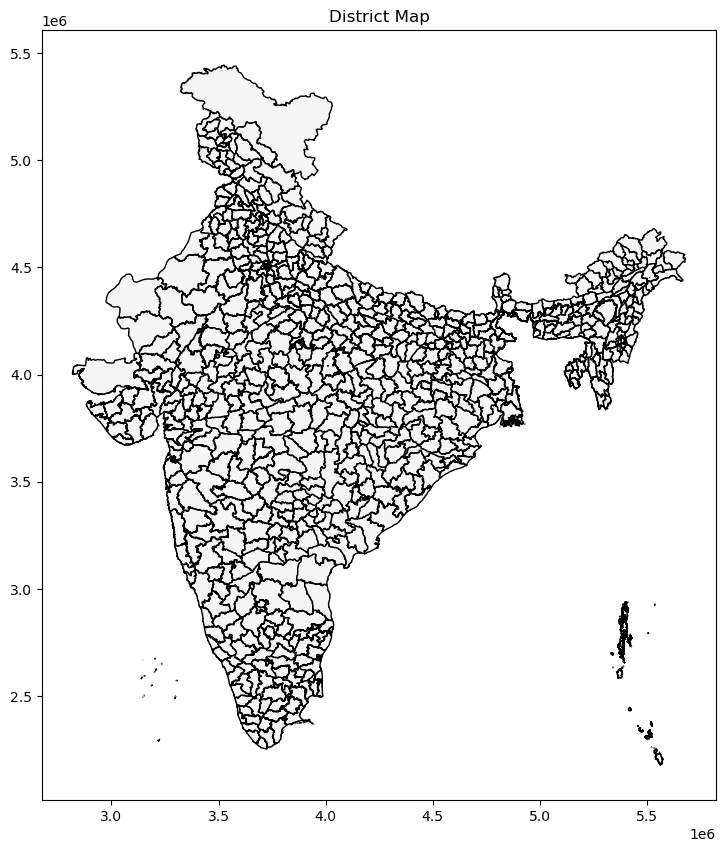

Greedy Best-First Search:
Solution path: [('MORBI', 'AHMAD>B>D'), ('SURENDRANAGAR', 'SURENDRANAGAR')]
Nodes generated: 2
Time taken (seconds): 0.005240678787231445

A* Search:
Solution path: [('MORBI', 'AHMAD>B>D'), ('SURENDRANAGAR', 'SURENDRANAGAR')]
Nodes generated: 2
Time taken (seconds): 0.0009963512420654297


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
from shapely.geometry import Point

# -------------------------
# 1. Load Data and Construct Graph
# -------------------------

# Load the district-level shapefile (or GeoDataFrame) that contains columns like 'District' and 'geometry'
# Replace 'districts_data.shp' with the actual file path.
gdf = gpd.read_file('../archive/DISTRICT_BOUNDARY.shp')

# Compute centroid for each district to use as a proxy for its coordinate
gdf['centroid'] = gdf.geometry.centroid
# Extract X and Y coordinates (assuming the projection is appropriate for Euclidean distance)
gdf['x'] = gdf.centroid.x
gdf['y'] = gdf.centroid.y

# Plot the map to visualize districts (optional)
ax = gdf.plot(figsize=(10, 10), edgecolor='black', color='whitesmoke')
plt.title('District Map')
plt.show()

# Build a dictionary for district coordinates for quick lookup
# Key: District name, Value: (x, y) tuple
district_coords = {row['District']: (row['x'], row['y']) for idx, row in gdf.iterrows()}

# Build a neighbors dictionary based on spatial relation (using the touches method)
neighbors_dict = {}
for idx, row in gdf.iterrows():
    district = row['District']
    neighbors = []
    # Using spatial index improves efficiency for large datasets, for simplicity we do a loop.
    for idx2, other in gdf.iterrows():
        if row['District'] != other['District']:
            # If the boundaries touch, they are considered neighbors
            if row.geometry.touches(other.geometry):
                neighbors.append(other['District'])
    neighbors_dict[district] = neighbors

# -------------------------
# 2. Define Distance, Heuristic, and Transition Cost Functions
# -------------------------

def euclidean_distance(coord1, coord2):
    # Since these coordinates are in a projected coordinate system, we use Euclidean distance.
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def transition_cost(district_from, district_to):
    # The cost (time) to move from one district to its neighbor is defined as 2 * distance
    cost = 2 * euclidean_distance(district_coords[district_from], district_coords[district_to])
    return cost

def state_heuristic(state):
    # Define the heuristic for a state as the straight-line distance between the two districts
    # Lower bound: they must meet, so the two locations must converge.
    d1, d2 = state
    return euclidean_distance(district_coords[d1], district_coords[d2])

# -------------------------
# 3. Formulate the Search Problem
# -------------------------

# We represent each state as (my_district, friend_district). The goal is reached when both are in the same district.
# For demonstration, suppose friend1 starts at district 'MORBI' and friend2 at 'AHMAD>B>D'
start_state = ('MORBI', 'AHMAD>B>D')

def goal_condition(state):
    d1, d2 = state
    return d1 == d2

# -------------------------
# 4. Implement Search: Greedy Best-First Search and A*
# -------------------------

class State:
    def __init__(self, pos1, pos2, cost=0, path=None):
        self.pos1 = pos1  # my current district
        self.pos2 = pos2  # friend's current district
        self.cost = cost
        self.path = path or [(pos1, pos2)]
    def __lt__(self, other):
        # Comparison over states (used for the heap queue)
        return self.cost < other.cost

def get_successors(state):
    successors = []
    pos1, pos2 = state.pos1, state.pos2
    # For each neighbor of pos1 and pos2 (simultaneous move)
    for n1 in neighbors_dict.get(pos1, []):
        for n2 in neighbors_dict.get(pos2, []):
            # Calculate cost for each individual move
            cost1 = transition_cost(pos1, n1)
            cost2 = transition_cost(pos2, n2)
            # Since both friends move simultaneously, the effective cost is the maximum of both
            step_cost = max(cost1, cost2)
            new_state = State(n1, n2, state.cost + step_cost, state.path + [(n1, n2)])
            successors.append(new_state)
    return successors

def greedy_best_first_search(start_state_obj, heuristic_func):
    start_time = time.time()
    nodes_generated = 0
    frontier = []
    # Priority is based solely on heuristic value
    heapq.heappush(frontier, (heuristic_func(start_state_obj.path[-1]), start_state_obj))
    while frontier:
        _, current = heapq.heappop(frontier)
        nodes_generated += 1
        if goal_condition((current.pos1, current.pos2)):
            return current, nodes_generated, time.time() - start_time
        for successor in get_successors(current):
            heapq.heappush(frontier, (heuristic_func(successor.path[-1]), successor))
    return None, nodes_generated, time.time() - start_time

def a_star_search(start_state_obj, heuristic_func):
    start_time = time.time()
    nodes_generated = 0
    frontier = []
    # For A*, priority is cost so far plus heuristic.
    heapq.heappush(frontier, (start_state_obj.cost + heuristic_func(start_state_obj.path[-1]), start_state_obj))
    explored = set()
    while frontier:
        _, current = heapq.heappop(frontier)
        nodes_generated += 1
        key = (current.pos1, current.pos2)
        if key in explored:
            continue
        explored.add(key)
        if goal_condition((current.pos1, current.pos2)):
            return current, nodes_generated, time.time() - start_time
        for successor in get_successors(current):
            total_cost = successor.cost + heuristic_func(successor.path[-1])
            heapq.heappush(frontier, (total_cost, successor))
    return None, nodes_generated, time.time() - start_time

# Initialize state for search
initial_state_obj = State(start_state[0], start_state[1])

# Run Greedy Best-First Search
greedy_solution, greedy_nodes, greedy_time = greedy_best_first_search(initial_state_obj, lambda state: state_heuristic(state))
print("Greedy Best-First Search:")
if greedy_solution:
    print("Solution path:", greedy_solution.path)
else:
    print("No solution found.")
print("Nodes generated:", greedy_nodes)
print("Time taken (seconds):", greedy_time)

# Run A* Search
astar_solution, astar_nodes, astar_time = a_star_search(initial_state_obj, lambda state: state_heuristic(state))
print("\nA* Search:")
if astar_solution:
    print("Solution path:", astar_solution.path)
else:
    print("No solution found.")
print("Nodes generated:", astar_nodes)
print("Time taken (seconds):", astar_time)


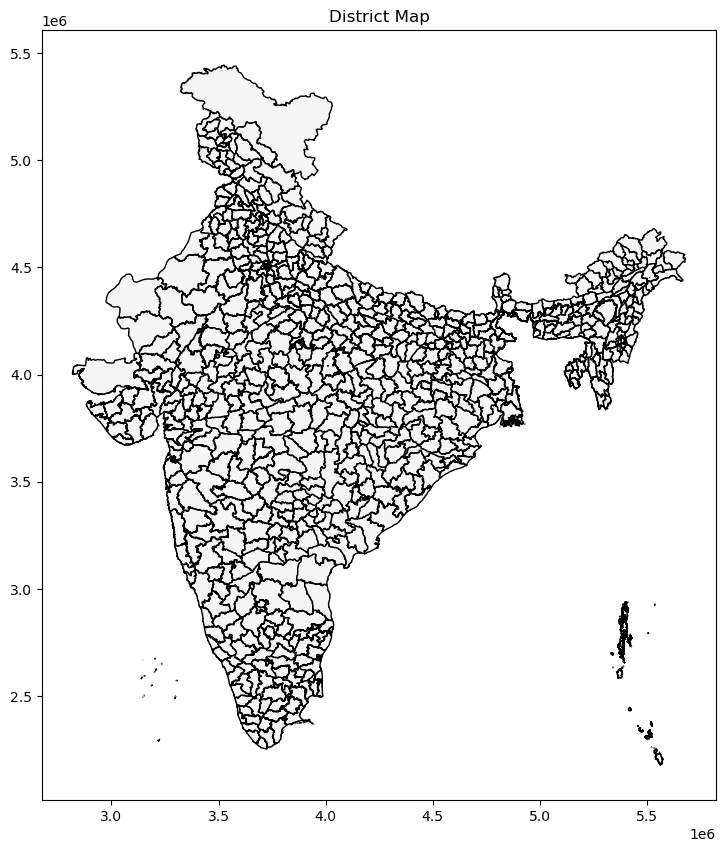

Greedy Best-First Search with Default Heuristic:
Solution path: [('MORBI', 'AHMAD>B>D'), ('SURENDRANAGAR', 'SURENDRANAGAR')]
Nodes generated: 2
Time taken (s): 0.003999233245849609

A* Search with Default Heuristic:
Solution path: [('MORBI', 'AHMAD>B>D'), ('SURENDRANAGAR', 'SURENDRANAGAR')]
Nodes generated: 2
Time taken (s): 0.0

Greedy Best-First Search with Realistic (Road Distance) Heuristic:
Solution path: [('MORBI', 'AHMAD>B>D'), ('SURENDRANAGAR', 'SURENDRANAGAR')]
Nodes generated: 2
Time taken (s): 0.001001596450805664

A* Search with Realistic (Road Distance) Heuristic:
Solution path: [('MORBI', 'AHMAD>B>D'), ('SURENDRANAGAR', 'SURENDRANAGAR')]
Nodes generated: 2
Time taken (s): 0.0


In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
from shapely.geometry import Point

# -------------------------
# 1. Load Map Data and Prepare Graph
# -------------------------
# Load the district-level shapefile containing columns such as 'District', 'STATE', 'geometry', etc.
# Replace 'districts_data.shp' with your actual shapefile path.

gdf = gpd.read_file('../archive/DISTRICT_BOUNDARY.shp')

# Compute centroids for each district to serve as location proxies
gdf['centroid'] = gdf.geometry.centroid
gdf['x'] = gdf.centroid.x
gdf['y'] = gdf.centroid.y

# Optional: Visualize the map
ax = gdf.plot(figsize=(10, 10), edgecolor='black', color='whitesmoke')
plt.title('District Map')
plt.show()

# Build a dictionary to quickly access district centroid coordinates.
# Key: District name, Value: (x, y)
district_coords = {row['District']: (row['x'], row['y']) for idx, row in gdf.iterrows()}

# Build a neighbors dictionary based on touching (shared boundaries) using shapely's touches method.
neighbors_dict = {}
for idx, row in gdf.iterrows():
    district = row['District']
    neighbors = []
    for idx2, other in gdf.iterrows():
        if district != other['District']:
            if row.geometry.touches(other.geometry):
                neighbors.append(other['District'])
    neighbors_dict[district] = neighbors

# -------------------------
# 2. Define Distance and Heuristic Functions
# -------------------------
def euclidean_distance(coord1, coord2):
    """Compute the Euclidean distance between two coordinates."""
    return np.sqrt((coord1[0]-coord2[0])**2 + (coord1[1]-coord2[1])**2)

def transition_cost(from_district, to_district):
    """
    Compute the cost of moving from one district to a neighboring district.
    The cost is defined as twice the Euclidean distance.
    """
    return 2 * euclidean_distance(district_coords[from_district], district_coords[to_district])

def default_heuristic(state):
    """
    Default heuristic: straight-line (Euclidean) distance between the two districts.
    'state' is a tuple: (district1, district2)
    """
    pos1, pos2 = state
    return euclidean_distance(district_coords[pos1], district_coords[pos2])

def road_distance(coord1, coord2):
    """
    A placeholder for realistic road distance.
    Here we simulate by scaling the Euclidean distance (e.g., factor 1.3).
    """
    return 1.3 * euclidean_distance(coord1, coord2)

def realistic_heuristic(state):
    """
    Realistic heuristic using simulated road distance.
    'state' is a tuple: (district1, district2)
    """
    pos1, pos2 = state
    return road_distance(district_coords[pos1], district_coords[pos2])

# -------------------------
# 3. Define the State Representation and Search Problem
# -------------------------
class State:
    def __init__(self, pos1, pos2, cost=0, path=None):
        self.pos1 = pos1      # Your current district
        self.pos2 = pos2      # Friend's current district
        self.cost = cost      # Total cost accumulated so far
        self.path = path or [(pos1, pos2)]  # History of states
    def __lt__(self, other):
        # Allows the state to be compared based on cost (used in the priority queue)
        return self.cost < other.cost

def goal_condition(state):
    """
    The goal is reached when both friends are in the same district.
    'state' is a tuple: (district1, district2)
    """
    pos1, pos2 = state
    return pos1 == pos2

def get_successors(state_obj):
    """
    Generate successor states by simultaneously moving each friend to a neighboring district.
    The transition cost for a move is the maximum of the two individual move costs.
    """
    successors = []
    pos1, pos2 = state_obj.pos1, state_obj.pos2
    for n1 in neighbors_dict.get(pos1, []):
        for n2 in neighbors_dict.get(pos2, []):
            cost1 = transition_cost(pos1, n1)
            cost2 = transition_cost(pos2, n2)
            step_cost = max(cost1, cost2)  # Both move simultaneously and the faster one waits.
            new_state = State(n1, n2, state_obj.cost + step_cost, state_obj.path + [(n1, n2)])
            successors.append(new_state)
    return successors

# -------------------------
# 4. Implement the Search Algorithms
# -------------------------
def greedy_best_first_search(initial_state, heuristic_func):
    """
    Greedy Best-first search using only the heuristic to guide expansion.
    """
    start_time = time.time()
    nodes_generated = 0
    frontier = []
    # Priority is based solely on the heuristic
    heapq.heappush(frontier, (heuristic_func((initial_state.pos1, initial_state.pos2)), initial_state))
    while frontier:
        _, current = heapq.heappop(frontier)
        nodes_generated += 1
        if goal_condition((current.pos1, current.pos2)):
            return current, nodes_generated, time.time() - start_time
        for successor in get_successors(current):
            heapq.heappush(frontier, (heuristic_func((successor.pos1, successor.pos2)), successor))
    return None, nodes_generated, time.time() - start_time

def a_star_search(initial_state, heuristic_func):
    """
    A* search combining actual cost so far with the heuristic.
    """
    start_time = time.time()
    nodes_generated = 0
    frontier = []
    heapq.heappush(frontier,
                   (initial_state.cost + heuristic_func((initial_state.pos1, initial_state.pos2)), initial_state))
    explored = set()
    while frontier:
        _, current = heapq.heappop(frontier)
        nodes_generated += 1
        state_key = (current.pos1, current.pos2)
        if state_key in explored:
            continue
        explored.add(state_key)
        if goal_condition((current.pos1, current.pos2)):
            return current, nodes_generated, time.time() - start_time
        for successor in get_successors(current):
            total_cost = successor.cost + heuristic_func((successor.pos1, successor.pos2))
            heapq.heappush(frontier, (total_cost, successor))
    return None, nodes_generated, time.time() - start_time

# -------------------------
# 5. Running the Searches with Different Heuristics
# -------------------------
# Define an initial state. For example, assume friend1 starts at 'MORBI' and friend2 at 'AHMAD>B>D'
initial_state_obj = State('MORBI', 'AHMAD>B>D')

# Run Greedy Best-First Search with the default (Euclidean) heuristic.
result_greedy_default, nodes_greedy_default, time_greedy_default = greedy_best_first_search(
    initial_state_obj, default_heuristic)
print("Greedy Best-First Search with Default Heuristic:")
if result_greedy_default:
    print("Solution path:", result_greedy_default.path)
    print("Nodes generated:", nodes_greedy_default)
    print("Time taken (s):", time_greedy_default)
else:
    print("No solution found.")

# Run A* Search with the default (Euclidean) heuristic.
result_astar_default, nodes_astar_default, time_astar_default = a_star_search(
    initial_state_obj, default_heuristic)
print("\nA* Search with Default Heuristic:")
if result_astar_default:
    print("Solution path:", result_astar_default.path)
    print("Nodes generated:", nodes_astar_default)
    print("Time taken (s):", time_astar_default)
else:
    print("No solution found.")

# Now change the heuristic function to a more realistic one based on road distance.
# Run Greedy Best-First Search with the realistic heuristic.
result_greedy_realistic, nodes_greedy_realistic, time_greedy_realistic = greedy_best_first_search(
    initial_state_obj, realistic_heuristic)
print("\nGreedy Best-First Search with Realistic (Road Distance) Heuristic:")
if result_greedy_realistic:
    print("Solution path:", result_greedy_realistic.path)
    print("Nodes generated:", nodes_greedy_realistic)
    print("Time taken (s):", time_greedy_realistic)
else:
    print("No solution found.")

# Run A* Search with the realistic heuristic.
result_astar_realistic, nodes_astar_realistic, time_astar_realistic = a_star_search(
    initial_state_obj, realistic_heuristic)
print("\nA* Search with Realistic (Road Distance) Heuristic:")
if result_astar_realistic:
    print("Solution path:", result_astar_realistic.path)
    print("Nodes generated:", nodes_astar_realistic)
    print("Time taken (s):", time_astar_realistic)
else:
    print("No solution found.")


In [8]:


import geopandas as gpd

taluka_lvl_data = gpd.read_file("../archive/india_taluk.geojson")
taluka_lvl_data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,geometry
0,105,IND,India,7,Chhattisgarh,110,Kawardha,334,Kawardha,None,None,Taluk,Taluk,"POLYGON ((81.19419 22.46208, 81.19308 22.45114..."
1,105,IND,India,7,Chhattisgarh,110,Kawardha,335,Pandaria,None,None,Taluk,Taluk,"POLYGON ((81.47986 22.49331, 81.48182 22.48764..."
2,105,IND,India,7,Chhattisgarh,111,Korba,336,Katghora,None,None,Taluk,Taluk,"POLYGON ((82.56844 22.96502, 82.56003 22.96093..."
3,105,IND,India,7,Chhattisgarh,111,Korba,337,Korba,None,None,Taluk,Taluk,"POLYGON ((82.82744 22.74267, 82.84205 22.74336..."
4,105,IND,India,7,Chhattisgarh,112,Koriya,338,Baikunthpur,None,None,Taluk,Taluk,"POLYGON ((82.49175 23.78571, 82.49255 23.77529..."


C:\Users\Mahantesh\AppData\Local\Temp\ipykernel_26480\2618307137.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taluka_data["centroid"] = taluka_data.geometry.centroid


Start state (your city, friend's city): (0, 515)

Running Greedy Best First Search (straight-line heuristic)...
Greedy Result: {'path': [(0, 515), (np.int64(359), np.int64(558)), (np.int64(360), np.int64(561)), (np.int64(474), np.int64(557)), (np.int64(383), np.int64(610)), (np.int64(537), np.int64(614)), (np.int64(534), np.int64(564)), (np.int64(526), np.int64(678)), (np.int64(535), np.int64(679)), (np.int64(674), np.int64(676)), (np.int64(677), np.int64(677))], 'total_cost': 9.631486097505418, 'nodes_generated': 362, 'max_frontier_size': 352, 'execution_time': 0.11194467544555664}

Running A* Search (straight-line heuristic)...
A* Result: {'path': [(0, 515), (np.int64(22), np.int64(558)), (np.int64(242), np.int64(641)), (np.int64(241), np.int64(642)), (np.int64(590), np.int64(617)), (np.int64(551), np.int64(615)), (np.int64(550), np.int64(637)), (np.int64(573), np.int64(640)), (np.int64(579), np.int64(636)), (np.int64(686), np.int64(638)), (np.int64(32), np.int64(32))], 'total_cost':

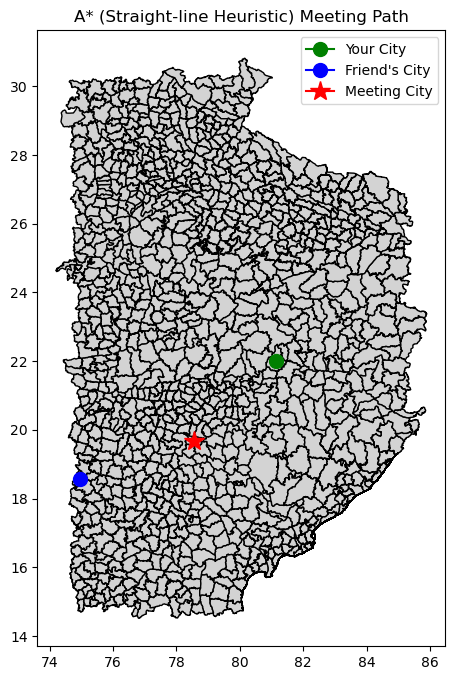

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import time, heapq, math

# ========================
# 1. LOAD DATA AND PREPARE
# ========================

# Load the India taluka GeoJSON file
# (Make sure the file path is correct.)
taluka_data = gpd.read_file("../archive/india_taluk.geojson")

# Compute centroids of each taluka (we use these as the city’s location)
taluka_data["centroid"] = taluka_data.geometry.centroid

# For demonstration purposes, we restrict our search to a smaller region.
# For example, choose a bounding box that covers two states.
# (Adjust these bounds based on your dataset; here we assume the full dataset has multiple states.)
minx, miny, maxx, maxy = 75, 15, 85, 30
subset = taluka_data.cx[minx:maxx, miny:maxy].copy()
subset = subset.reset_index(drop=True)

# Build a spatial index for the subset (improves neighbor lookup)
spatial_index = subset.sindex

# ================================
# 2. BUILD THE NEIGHBOR DICTIONARY
# ================================

# We assume that if two taluka polygons share a boundary, they are neighbors.
neighbors = {}
for idx, row in subset.iterrows():
    # Use the spatial index to find possible neighbors that touch the polygon
    possible = list(spatial_index.query(row.geometry, predicate="touches"))
    # Remove self if present
    possible = [i for i in possible if i != idx]
    neighbors[idx] = possible

# ================================
# 3. DEFINE DISTANCE AND HEURISTICS
# ================================

def euclidean_distance(idx1, idx2):
    """Compute Euclidean distance between centroids of two cities (talukas)."""
    pt1 = subset.loc[idx1, "centroid"]
    pt2 = subset.loc[idx2, "centroid"]
    # Note: since the coordinates are in degrees, this is not in kilometers.
    return pt1.distance(pt2)

# Heuristic 1: Straight-line (Euclidean) distance between the two cities.
def h_straight(state):
    cityA, cityB = state
    return euclidean_distance(cityA, cityB)

# Heuristic 2: Modified “road” distance.
# (Here we simply multiply by a factor to simulate a more realistic distance.)
def h_road(state, factor=1.3):
    return factor * h_straight(state)

# ================================
# 4. DEFINE STATE-TRANSITION FUNCTION
# ================================

def get_neighbors(state):
    """
    For a state (city_A, city_B), generate all possible next states.
    Each agent moves to one of its neighboring cities.
    The cost to go from (A, B) to (A', B') is:
         cost = max(2 * d(A, A'), 2 * d(B, B'))
    """
    cityA, cityB = state
    next_states = []
    for nA in neighbors.get(cityA, []):
        for nB in neighbors.get(cityB, []):
            cost_A = 2 * euclidean_distance(cityA, nA)
            cost_B = 2 * euclidean_distance(cityB, nB)
            step_cost = max(cost_A, cost_B)
            next_states.append(((nA, nB), step_cost))
    return next_states

# ================================
# 5. SEARCH ALGORITHM IMPLEMENTATIONS
# ================================

def search(start_state, heuristic_fn, strategy="astar"):
    """
    General search routine for our two-agent problem.
    
    Parameters:
      - start_state: tuple (city_index_A, city_index_B)
      - heuristic_fn: function to compute the heuristic given a state.
                      Should take a state as input.
      - strategy: "greedy" for Greedy Best First Search, "astar" for A*.
    
    Returns:
      - result: dict containing the solution path, total cost, and search metrics.
    """
    # Priority queue: each element is (priority, cost_so_far, state, path)
    frontier = []
    # Initial cost is 0; path holds the states from start to goal.
    initial_priority = heuristic_fn(start_state) if strategy=="greedy" else 0 + heuristic_fn(start_state)
    heapq.heappush(frontier, (initial_priority, 0, start_state, [start_state]))
    
    explored = set()  # to keep track of visited states
    
    nodes_generated = 1
    max_frontier_size = 1
    start_time = time.time()
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        priority, cost_so_far, current_state, path = heapq.heappop(frontier)
        
        # Goal test: if both agents are in the same city
        if current_state[0] == current_state[1]:
            elapsed_time = time.time() - start_time
            return {
                "path": path,
                "total_cost": cost_so_far,
                "nodes_generated": nodes_generated,
                "max_frontier_size": max_frontier_size,
                "execution_time": elapsed_time
            }
        
        # Avoid revisiting the same state
        if current_state in explored:
            continue
        explored.add(current_state)
        
        # Expand neighbors
        for next_state, step_cost in get_neighbors(current_state):
            new_cost = cost_so_far + step_cost
            # Choose priority based on strategy
            if strategy == "greedy":
                new_priority = heuristic_fn(next_state)
            elif strategy == "astar":
                new_priority = new_cost + heuristic_fn(next_state)
            else:
                raise ValueError("Unknown strategy")
            heapq.heappush(frontier, (new_priority, new_cost, next_state, path + [next_state]))
            nodes_generated += 1
            
    elapsed_time = time.time() - start_time
    # If no solution is found:
    return {
        "path": None,
        "total_cost": None,
        "nodes_generated": nodes_generated,
        "max_frontier_size": max_frontier_size,
        "execution_time": elapsed_time
    }

# ================================
# 6. SELECT STARTING POINTS
# ================================
# Assumptions:
#  - Our current city: choose one taluka in one state (e.g., Chhattisgarh)
#  - Friend's city: choose one from a different state (e.g., Maharashtra)
#  
# For this demonstration we pick two different indices from our subset.
# (Adjust the selection as needed depending on your dataset.)
#
# Here we simply choose two indices that (hopefully) belong to different states,
# using the 'NAME_1' column if available.
state_A = "Chhattisgarh"
state_B = "Maharashtra"
# Find candidate indices
indices_A = subset[subset["NAME_1"] == state_A].index.tolist()
indices_B = subset[subset["NAME_1"] == state_B].index.tolist()

# Fallback: if one of the states is not found in the subset, pick two different indices.
if not indices_A or not indices_B:
    start_state = (0, 1)
else:
    start_state = (indices_A[0], indices_B[0])

print("Start state (your city, friend's city):", start_state)

# ================================
# 7. RUN SEARCHES
# ================================
# Run Greedy Best First Search with the straight-line heuristic
print("\nRunning Greedy Best First Search (straight-line heuristic)...")
result_greedy = search(start_state, heuristic_fn=h_straight, strategy="greedy")
print("Greedy Result:", result_greedy)

# Run A* Search with the straight-line heuristic
print("\nRunning A* Search (straight-line heuristic)...")
result_astar = search(start_state, heuristic_fn=h_straight, strategy="astar")
print("A* Result:", result_astar)

# Now run A* Search with the modified "road" heuristic
print("\nRunning A* Search (modified road heuristic)...")
result_astar_road = search(start_state, heuristic_fn=lambda s: h_road(s, factor=1.3), strategy="astar")
print("A* (Road Heuristic) Result:", result_astar_road)

# ================================
# 8. VISUALIZATION
# ================================
# Let’s visualize the meeting path for one of the searches (if a path was found).
def plot_meeting_path(result, title="Meeting Path"):
    if result["path"] is None:
        print("No solution path to plot.")
        return
    
    # Extract the cities (indices) visited by each agent.
    # For visualization, we plot the centroids of the meeting city and the path taken.
    path = result["path"]
    # For each state, pick the meeting city (both agents have the same city at goal)
    meeting_idx = path[-1][0]
    meeting_city = subset.loc[meeting_idx, "centroid"]
    
    fig, ax = plt.subplots(figsize=(8, 8))
    # Plot all taluka centroids
    subset.plot(ax=ax, color="lightgray", edgecolor="black")
    # Plot centroids of start and meeting cities
    startA = subset.loc[start_state[0], "centroid"]
    startB = subset.loc[start_state[1], "centroid"]
    ax.plot(startA.x, startA.y, marker="o", color="green", markersize=10, label="Your City")
    ax.plot(startB.x, startB.y, marker="o", color="blue", markersize=10, label="Friend's City")
    ax.plot(meeting_city.x, meeting_city.y, marker="*",
            color="red", markersize=15, label="Meeting City")
    ax.set_title(title)
    ax.legend()
    plt.show()

# Plot the meeting path for A* using straight-line heuristic (if found)
plot_meeting_path(result_astar, title="A* (Straight-line Heuristic) Meeting Path")


In [12]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


C:\Users\Mahantesh\AppData\Local\Temp\ipykernel_16704\3867452004.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taluka_data["centroid"] = taluka_data.geometry.centroid


Start state (Your city, Friend's city): (0, 515)

Running Greedy Best First Search (Straight-line heuristic)...
Greedy Result: {'path': [(0, 515), (np.int64(359), np.int64(558)), (np.int64(360), np.int64(561)), (np.int64(474), np.int64(557)), (np.int64(383), np.int64(610)), (np.int64(537), np.int64(614)), (np.int64(534), np.int64(564)), (np.int64(526), np.int64(678)), (np.int64(535), np.int64(679)), (np.int64(674), np.int64(676)), (np.int64(677), np.int64(677))], 'total_cost': 9.631486097505418, 'nodes_generated': 362, 'max_frontier_size': 352, 'execution_time': 0.1782207489013672}

Running A* Search (Straight-line heuristic)...
A* Result: {'path': [(0, 515), (np.int64(22), np.int64(558)), (np.int64(242), np.int64(641)), (np.int64(241), np.int64(642)), (np.int64(590), np.int64(617)), (np.int64(551), np.int64(615)), (np.int64(550), np.int64(637)), (np.int64(573), np.int64(640)), (np.int64(579), np.int64(636)), (np.int64(686), np.int64(638)), (np.int64(32), np.int64(32))], 'total_cost': 

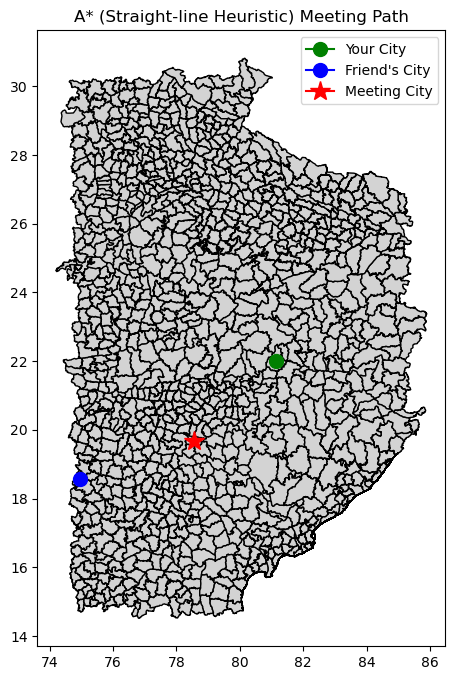


Live interactive map saved as 'live_india_map.html'. Open it in your browser to view.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import time, heapq, math
import folium
from folium.plugins import MarkerCluster

# ================================
# 1. LOAD DATA AND PREPARE
# ================================

# Load the India taluka GeoJSON file
taluka_data = gpd.read_file("../archive/india_taluk.geojson")

# Compute centroids for each taluka (we use these as the city’s location)
taluka_data["centroid"] = taluka_data.geometry.centroid

# For demonstration, we limit the data to a region with multiple states.
# Adjust the bounding box (minx, miny, maxx, maxy) as needed.
minx, miny, maxx, maxy = 75, 15, 85, 30
subset = taluka_data.cx[minx:maxx, miny:maxy].copy()
subset = subset.reset_index(drop=True)

# Build a spatial index for efficient neighbor lookup
spatial_index = subset.sindex

# ================================
# 2. BUILD THE NEIGHBOR DICTIONARY
# ================================

# We assume that talukas whose polygons touch are neighbors.
neighbors = {}
for idx, row in subset.iterrows():
    # Query potential neighbors using the spatial index with the "touches" predicate.
    possible = list(spatial_index.query(row.geometry, predicate="touches"))
    # Remove self from the list if present.
    possible = [i for i in possible if i != idx]
    neighbors[idx] = possible

# ================================
# 3. DEFINE DISTANCE AND HEURISTICS
# ================================

def euclidean_distance(idx1, idx2):
    """Compute Euclidean distance between centroids of two talukas."""
    pt1 = subset.loc[idx1, "centroid"]
    pt2 = subset.loc[idx2, "centroid"]
    # Note: Coordinates are in degrees.
    return pt1.distance(pt2)

# Heuristic 1: Straight-line (Euclidean) distance between the two cities.
def h_straight(state):
    cityA, cityB = state
    return euclidean_distance(cityA, cityB)

# Heuristic 2: Modified “road” distance (simulated by multiplying by a factor).
def h_road(state, factor=1.3):
    return factor * h_straight(state)

# ================================
# 4. DEFINE STATE-TRANSITION FUNCTION
# ================================

def get_neighbors(state):
    """
    For a state (city_A, city_B), generate all possible next states.
    Each agent moves to one of its neighboring cities.
    The cost to move from (A, B) to (A', B') is:
         cost = max(2 * d(A, A'), 2 * d(B, B'))
    """
    cityA, cityB = state
    next_states = []
    for nA in neighbors.get(cityA, []):
        for nB in neighbors.get(cityB, []):
            cost_A = 2 * euclidean_distance(cityA, nA)
            cost_B = 2 * euclidean_distance(cityB, nB)
            step_cost = max(cost_A, cost_B)
            next_states.append(((nA, nB), step_cost))
    return next_states

# ================================
# 5. SEARCH ALGORITHM IMPLEMENTATIONS
# ================================

def search(start_state, heuristic_fn, strategy="astar"):
    """
    General search routine for our two-agent problem.
    
    Parameters:
      - start_state: tuple (city_index_A, city_index_B)
      - heuristic_fn: function to compute the heuristic given a state.
      - strategy: "greedy" (Greedy Best First) or "astar" (A* Search).
    
    Returns:
      - A dict containing the solution path, total cost, nodes generated,
        maximum frontier size, and execution time.
    """
    # Priority queue: each element is (priority, cost_so_far, state, path)
    frontier = []
    initial_priority = heuristic_fn(start_state) if strategy=="greedy" else (0 + heuristic_fn(start_state))
    heapq.heappush(frontier, (initial_priority, 0, start_state, [start_state]))
    
    explored = set()
    nodes_generated = 1
    max_frontier_size = 1
    start_time = time.time()
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        priority, cost_so_far, current_state, path = heapq.heappop(frontier)
        
        # Goal test: if both agents are in the same city.
        if current_state[0] == current_state[1]:
            elapsed_time = time.time() - start_time
            return {
                "path": path,
                "total_cost": cost_so_far,
                "nodes_generated": nodes_generated,
                "max_frontier_size": max_frontier_size,
                "execution_time": elapsed_time
            }
        
        # Skip if state has been explored.
        if current_state in explored:
            continue
        explored.add(current_state)
        
        # Expand neighbor states.
        for next_state, step_cost in get_neighbors(current_state):
            new_cost = cost_so_far + step_cost
            if strategy == "greedy":
                new_priority = heuristic_fn(next_state)
            elif strategy == "astar":
                new_priority = new_cost + heuristic_fn(next_state)
            else:
                raise ValueError("Unknown strategy")
            heapq.heappush(frontier, (new_priority, new_cost, next_state, path + [next_state]))
            nodes_generated += 1
            
    elapsed_time = time.time() - start_time
    # If no solution is found:
    return {
        "path": None,
        "total_cost": None,
        "nodes_generated": nodes_generated,
        "max_frontier_size": max_frontier_size,
        "execution_time": elapsed_time
    }

# ================================
# 6. SELECT STARTING POINTS
# ================================
# Assumptions:
#  - Your city is in one state (e.g., Chhattisgarh)
#  - Your friend’s city is in another state (e.g., Maharashtra)
state_A = "Chhattisgarh"
state_B = "Maharashtra"

# Candidate indices based on the 'NAME_1' column.
indices_A = subset[subset["NAME_1"] == state_A].index.tolist()
indices_B = subset[subset["NAME_1"] == state_B].index.tolist()

# Fallback: if no indices found for either state, pick the first two indices.
if not indices_A or not indices_B:
    start_state = (0, 1)
else:
    start_state = (indices_A[0], indices_B[0])

print("Start state (Your city, Friend's city):", start_state)

# ================================
# 7. RUN SEARCHES
# ================================
print("\nRunning Greedy Best First Search (Straight-line heuristic)...")
result_greedy = search(start_state, heuristic_fn=h_straight, strategy="greedy")
print("Greedy Result:", result_greedy)

print("\nRunning A* Search (Straight-line heuristic)...")
result_astar = search(start_state, heuristic_fn=h_straight, strategy="astar")
print("A* Result:", result_astar)

print("\nRunning A* Search (Modified Road heuristic)...")
result_astar_road = search(start_state, heuristic_fn=lambda s: h_road(s, factor=1.3), strategy="astar")
print("A* (Road Heuristic) Result:", result_astar_road)

# ================================
# 8. VISUALIZATION WITH MATPLOTLIB
# ================================
def plot_meeting_path(result, title="Meeting Path"):
    if result["path"] is None:
        print("No solution path to plot.")
        return
    
    path = result["path"]
    meeting_idx = path[-1][0]
    meeting_city = subset.loc[meeting_idx, "centroid"]
    
    fig, ax = plt.subplots(figsize=(8, 8))
    subset.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Plot starting cities.
    startA = subset.loc[start_state[0], "centroid"]
    startB = subset.loc[start_state[1], "centroid"]
    ax.plot(startA.x, startA.y, marker="o", color="green", markersize=10, label="Your City")
    ax.plot(startB.x, startB.y, marker="o", color="blue", markersize=10, label="Friend's City")
    # Plot meeting city.
    ax.plot(meeting_city.x, meeting_city.y, marker="*", color="red", markersize=15, label="Meeting City")
    
    ax.set_title(title)
    ax.legend()
    plt.show()

# Visualize the meeting path for A* (using straight-line heuristic) if a path was found.
plot_meeting_path(result_astar, title="A* (Straight-line Heuristic) Meeting Path")

# ================================
# 9. LIVE INTERACTIVE MAP WITH FOLIUM
# ================================

# Compute average centroid coordinates for centering the map.
avg_lat = subset["centroid"].y.mean()
avg_lon = subset["centroid"].x.mean()

# Create a Folium map centered on India.
india_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)
marker_cluster = MarkerCluster().add_to(india_map)

# Add markers for each taluka centroid.
for idx, row in subset.iterrows():
    lat = row["centroid"].y
    lon = row["centroid"].x
    city_name = row.get("NAME_3", f"City {idx}")
    folium.Marker(
        location=[lat, lon],
        popup=str(city_name)
    ).add_to(marker_cluster)

# Mark your starting cities.
startA = subset.loc[start_state[0], "centroid"]
startB = subset.loc[start_state[1], "centroid"]
folium.Marker(
    location=[startA.y, startA.x],  # folium expects [lat, lon]
    popup="Your City",
    icon=folium.Icon(color="green", icon="user")
).add_to(india_map)
folium.Marker(
    location=[startB.y, startB.x],
    popup="Friend's City",
    icon=folium.Icon(color="blue", icon="user")
).add_to(india_map)

# If A* search found a meeting point, mark it.
if result_astar["path"] is not None:
    meeting_idx = result_astar["path"][-1][0]
    meeting_city = subset.loc[meeting_idx, "centroid"]
    folium.Marker(
        location=[meeting_city.y, meeting_city.x],
        popup="Meeting City",
        icon=folium.Icon(color="red", icon="star")
    ).add_to(india_map)

# Save the interactive map as an HTML file.
india_map.save("live_india_map.html")
print("\nLive interactive map saved as 'live_india_map.html'. Open it in your browser to view.")


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point

# ================================
# 1. LOAD COMPLETE INDIA DATA
# ================================

# Load the full India taluka GeoJSON file
taluka_data = gpd.read_file("../archive/india_taluk.geojson")

# Ensure correct CRS for Folium mapping
if (taluka_data.crs != "EPSG:4326"):
    taluka_data = taluka_data.to_crs("EPSG:4326")

# Compute centroids for each taluka (to use for markers)
taluka_data["centroid"] = taluka_data.geometry.centroid

# ================================
# 2. CREATE INTERACTIVE FOLIUM MAP
# ================================

# Define a reasonable center for India
india_center = [20.5937, 78.9629]  # Latitude, Longitude

# Create the map centered at India
m = folium.Map(location=india_center, zoom_start=5, tiles="cartodb positron")

# Convert GeoDataFrame to GeoJSON-compatible format
taluka_geojson = taluka_data.copy()
taluka_geojson = taluka_geojson.drop(columns=['centroid'])  # Remove centroid column

# Add GeoJSON layer to visualize all talukas
folium.GeoJson(
    taluka_geojson.__geo_interface__,  # Convert to GeoJSON format
    name="India Talukas",
    tooltip=folium.GeoJsonTooltip(fields=["NAME_1", "NAME_2"], aliases=["State", "Taluka"]),
    style_function=lambda x: {
        "fillColor": "lightblue",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.4
    }
).add_to(m)

# Add centroids as markers for better visualization
marker_cluster = folium.plugins.MarkerCluster().add_to(m)
for _, row in taluka_data.iterrows():
    # Extract coordinates from centroid Point object
    centroid = row["centroid"]
    folium.Marker(
        location=[centroid.y, centroid.x],  # Use coordinates directly
        popup=f"Taluka: {row['NAME_2']}<br>State: {row['NAME_1']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(marker_cluster)

# Display the map
m.save("india_taluka_map.html")
print("Interactive map saved as 'india_taluka_map.html'. Open it in a browser to view.")


C:\Users\Mahantesh\AppData\Local\Temp\ipykernel_16704\2729205031.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taluka_data["centroid"] = taluka_data.geometry.centroid


Interactive map saved as 'india_taluka_map.html'. Open it in a browser to view.
